Engy-5050 Spring 2025 UMass Lowell; Prof. V. F. de Almeida **28Apr2025**

# 05. Neutron Diffusion from a Slab Source w/ Reflector

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
  \newcommand{\Lcal}{\mathscr{L}}
$

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Vacuum Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. [Reflected Source w/ Vacuum BC](#reflected)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fembf)
   + [Results](#results)
1. [Bare Source w/ Vacuum BC](#bare)
   + [Data](#data-bare)
   + [Finite Element Lagrange Basis Functions](#fembf-bare)
   + [Results](#results-bare)

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, cartesian coordinates, neutron diffusion from a slab source into a reflective region exposed to vacuum.
 + Compare to bare slab source in vacuum.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[a,s]\subset\Reals\rightarrow\Reals$, $u_2:[s,b]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_1\, u_1'\bigr)' - \Sigma_{a,1}\,u_1 + s_0^{(1)} &= 0 \qquad \text{in}\ ]a,s[, \\
 -\bigl(-D_2\, u_2'\bigr)' - \Sigma_{a,2}\,u_2 + s_0^{(2)} &= 0 \qquad \text{in}\ ]s,b[, \\
  q_{1,n}(0) &= 0, \\
  u_1(s) &= u_2(s), \\
 q_{1,n}(s) &= q_{2,n}(s), \\
 q_{2,n}(b) &= \frac{u_2(b)}{2}, \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(x) = \flux_i(x)\cdot\normal(x) = -D_i\,u_i'(x)\,\ihat \cdot \normal(x) \ \forall \ i=1,2,3$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)' - \Sigma_a(x)\,u + s_0(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 q_n(a) &= 0, \\
 q_n(b) &= \frac{u(b)}{2}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(x)$, macroscopic absorption cross section, $\Sigma_a(x)$, source $s_0(x)$, and normal flux boundary conditions. Where $q_n(x) = \flux(x)\cdot\normal(x) = -D(x)\,u_i'(x)\,\ihat \cdot \normal(x)$.

## [Galerkin Method (or Rayleigh-Ritz) w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([a,b]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) - q_n(a)\,v(a) - q_n(b)\,v(b) &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([a,b]\bigr), 
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional
subspace of $H^1\!\bigl([a,b]\bigr)$, say $V_N([a,b]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([a,b]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) + 1/2\,\phi_j(b)\,\phi_i(b) $
  + $b_i = (s_0,\phi_i) $
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm).

## [Reflected Source](#toc)<a id="reflected"></a>

Consider a source slab surrounded by another slab exposed to vacuum.

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
x_a = 0*unit.cm  
x_s = 5*unit.cm  # thickness of source (2*x_s)
x_b = 10*unit.cm 

In [3]:
'''Domain'''
def show_domain(x_a, x_s, x_b, zoom=1):
    import pyvista as pv
    pv.set_plot_theme('paraview')
    h = 2
    source = pv.Box((x_a,x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_right = pv.Box((x_s,x_b,-h*x_s,h*x_s,-h*x_s,h*x_s))
    
    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(source, color='red', opacity=1.0,)
    plo.add_mesh(mat_right, color='tan', opacity=0.5)
    plo.add_axes(xlabel='X', ylabel='Y', zlabel='Z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(zoom)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [ ]:
plo = show_domain(x_a, x_s, x_b)

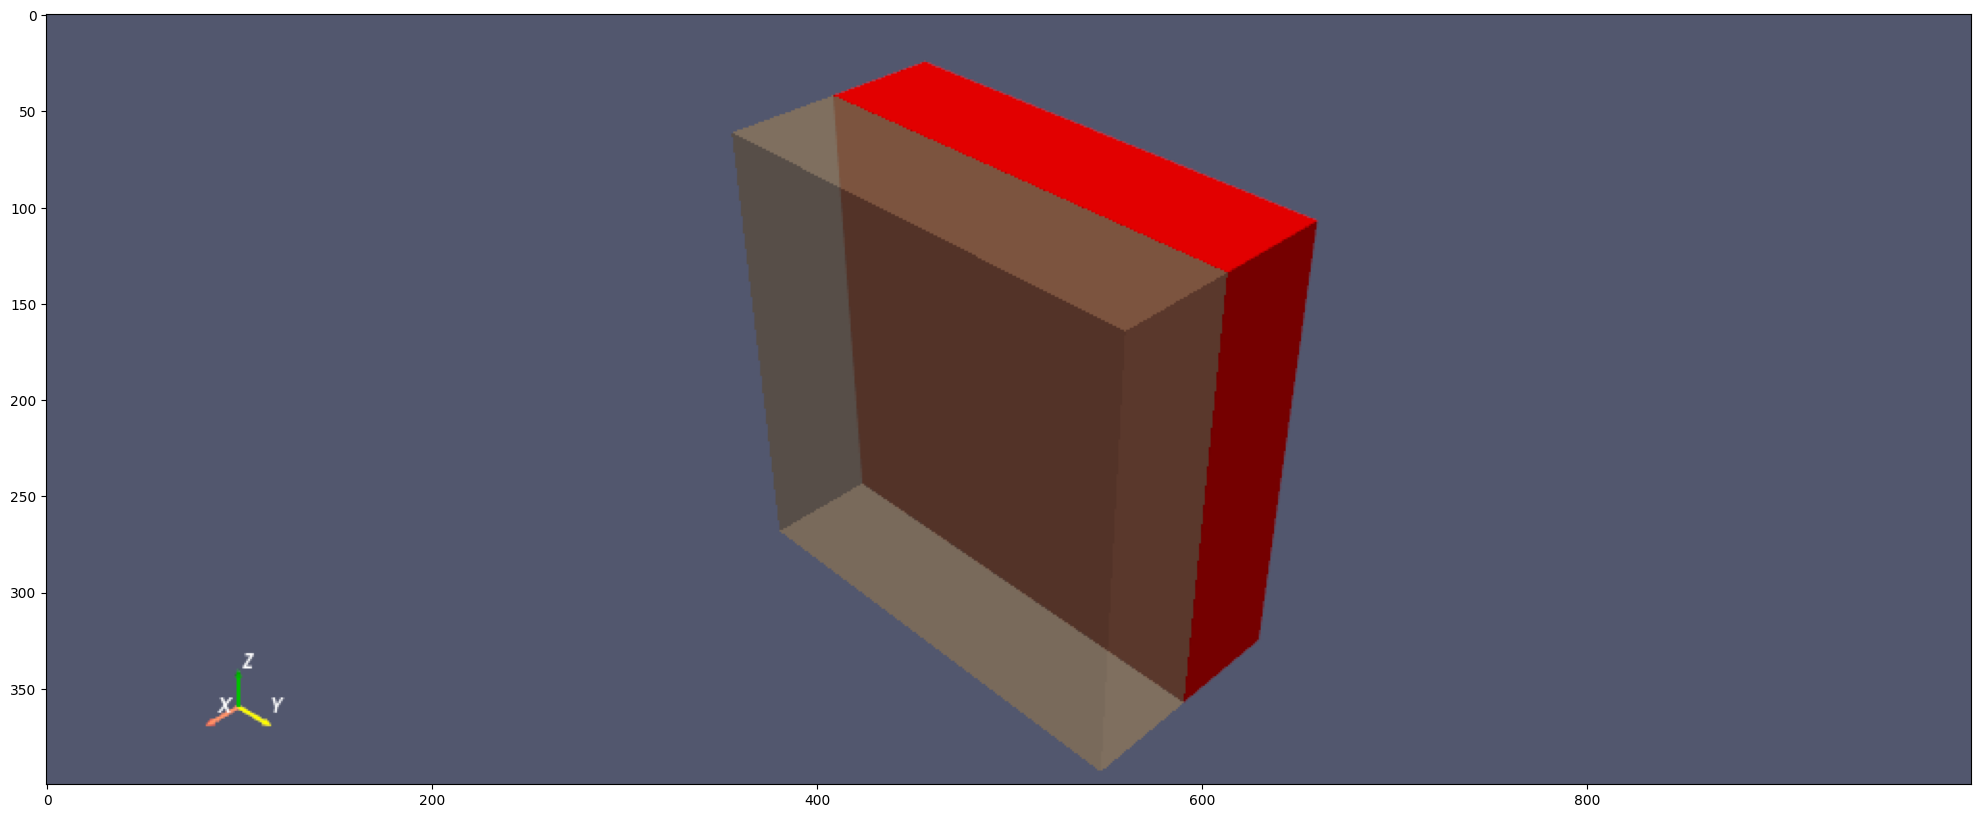

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $q_{na}$


In [6]:
'''Parameters and data'''
# Source
diffusion_coeff_1 = 1.44*unit.cm
sigma_f_fuel = 0.1/unit.cm
sigma_a_1 = sigma_f_fuel * 1.20 #20% increase from fission
source_1 = 100./unit.cm**3/unit.second #to mimic fuel
# sanity check
assert sigma_a_1 >= sigma_f_fuel

# Reflector
diffusion_coeff_2 = 1.85*unit.cm
sigma_a_2 = 0.01226/unit.cm
source_2 = 0./unit.cm**3/unit.second

# Left and right normal diffusive fluxes
q_na = 0
#q_nb = u(b)/2

In [7]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 3.464e+00
L2 [cm] = 1.228e+01


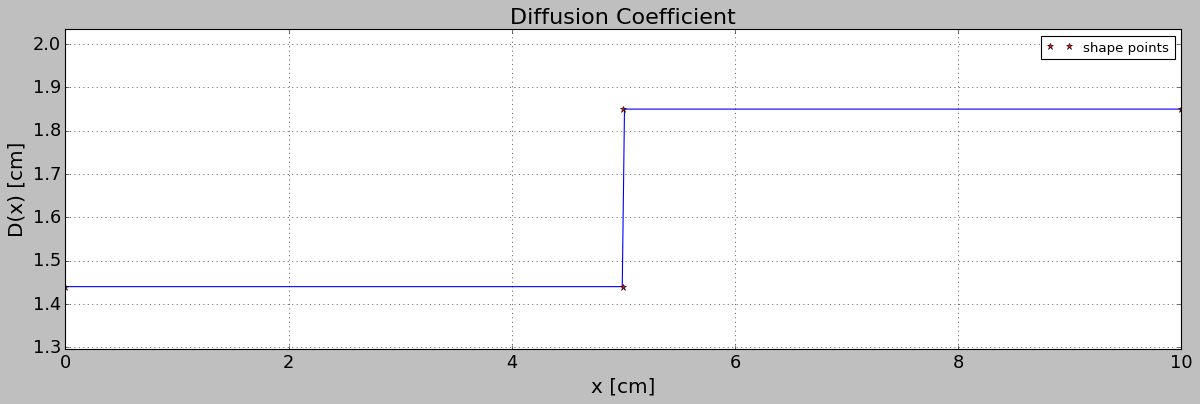

In [8]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(x_a, diffusion_coeff_1), (x_s, diffusion_coeff_1), 
             (x_s, diffusion_coeff_2), (x_b, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

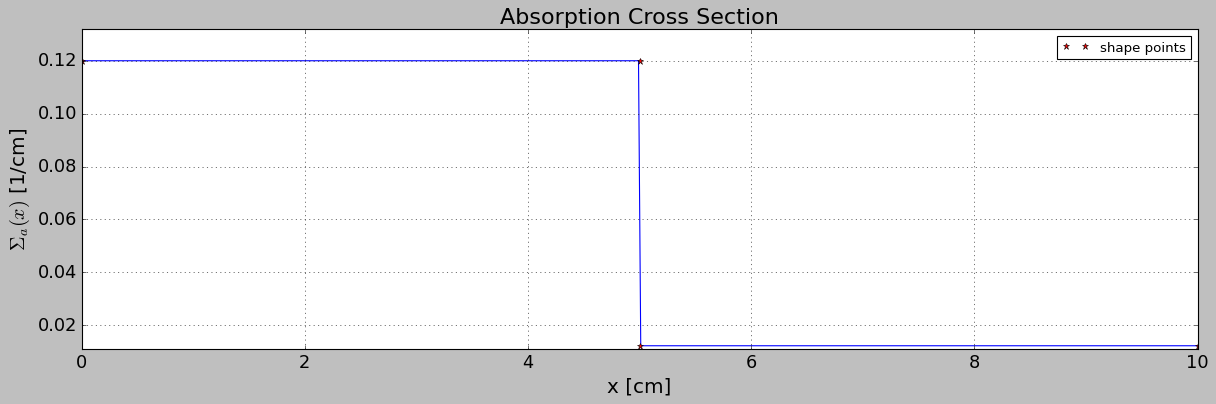

In [9]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_1), (x_s, sigma_a_1), 
             (x_s, sigma_a_2), (x_b, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

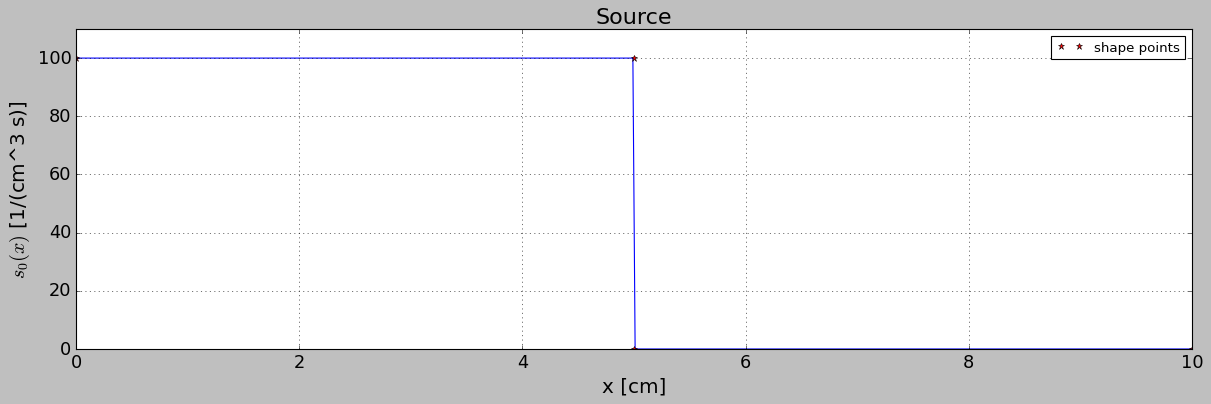

In [10]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, source_1), (x_s, source_1), 
             (x_s, source_2), (x_b, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf"></a>

Specify basis functions distribution on the material domain and degree.

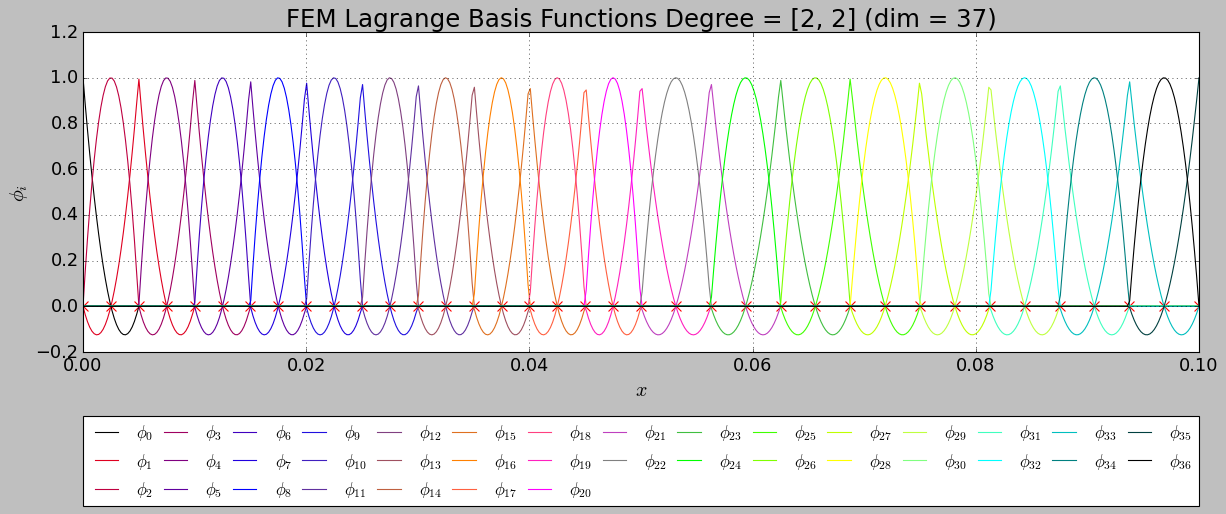

In [11]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2]
n_elem = [10,8] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) + 1/2\,\phi_j(b)\,\phi_i(b) $

In [12]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [13]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i)$

In [14]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
b_vec = s_vec

In [15]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [16]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [17]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [18]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  x_reflected=None, u_values_reflected=None, q_values_reflected=None,
                  u_legend='Solution w/ Vacuum BC', 
                  q_legend='Flux w/ Vacuum BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)
    if x_reflected is not None and u_values_reflected is not None:
        ax1.plot(x_reflected/unit.cm, u_values_reflected*unit.cm**2*unit.second, 'r--', label='Reflected')
        
    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)
    if x_reflected is not None and q_values_reflected is not None:
        ax2.plot(x_reflected/unit.cm, q_values_reflected*unit.cm**2*unit.second, 'b--', label='Reflected')

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

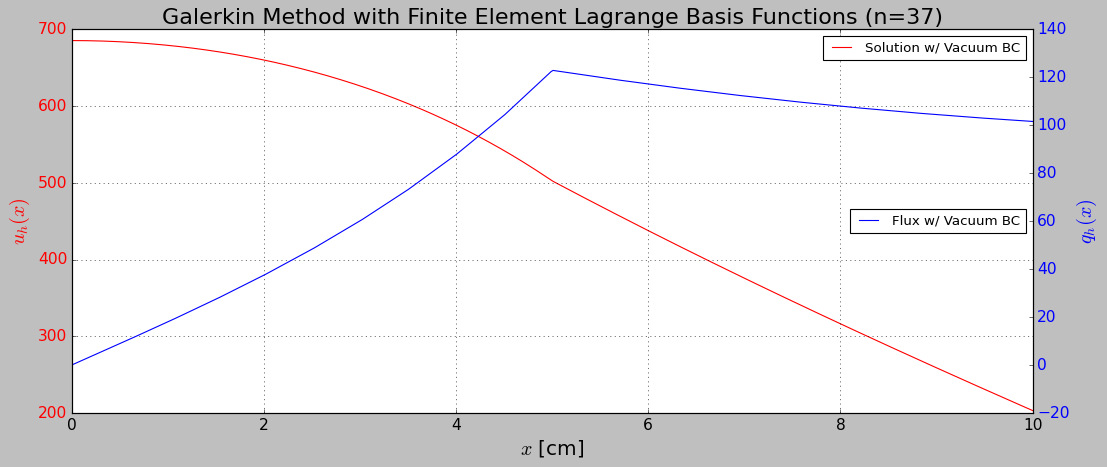

In [19]:
n_pts = 500
x_reflected = np.linspace(x_a, x_b, n_pts)
u_values_reflected = u_star(x_reflected)
q_values_reflected = -diffusion_coeff(x_reflected)*u_prime_star(x_reflected)

plot_solution(x_reflected, u_values_reflected, q_values_reflected)

In [20]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [1/(cm^2 s)]= ', u_star(x_a)[0]*unit.cm**2*unit.second, '  u^*_N(b) [1/(cm^2 s)]= ', u_star(x_b)[0]*unit.cm**2*unit.second)
print("u^*'_N(a) [1/(cm^3 s)]= ", u_prime_star(x_a)[0]*unit.cm*unit.second, " u^*'_N(b) [1/(cm^3 s)]= ", u_prime_star(x_b)[0]*unit.cm*unit.second)
u_xa_reflected = u_star(x_a)[0]*unit.cm**2*unit.second

u^*_N(a) [1/(cm^2 s)]=  685.3923334000727   u^*_N(b) [1/(cm^2 s)]=  203.2396012877358
u^*'_N(a) [1/(cm^3 s)]=  42.86646152734757  u^*'_N(b) [1/(cm^3 s)]=  -549176.9612769127


In [21]:
'''Flux at left boundary'''

print('q_na given    [#/(cm^2 s)]= ', q_na)
q_na_N = -(-diffusion_coeff(x_a)*u_prime_star(x_a)[0])*unit.cm**2*unit.second
print('q_na computed [#/(cm^2 s)]= ', q_na_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [#/(cm^2 s)]=  0
q_na computed [#/(cm^2 s)]=  0.00617277045993805


In [22]:
'''Flux at interface'''

q_ns_N = (-diffusion_coeff(x_s*.999)*u_prime_star(x_s*.999)[0])*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)
q_ns_reflected = q_ns_N

q_ns computed [#/(cm^2 s)]=  122.57366855334


In [23]:
'''Flux at interface'''

q_ns_N = (-diffusion_coeff(x_s*1.001)*u_prime_star(x_s*1.001)[0])*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_ns computed [#/(cm^2 s)]=  122.9043433912577


In [24]:
'''Flux at right boundary'''

print('q_nb given    [#/(cm^2 s)]= ', u_star(x_b)[0]/2*unit.cm**2*unit.second)
q_nb_N = -diffusion_coeff(x_b)*u_prime_star(x_b)[0]*unit.cm**2*unit.second
print('q_nb computed [#/(cm^2 s)]= ', q_nb_N)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [#/(cm^2 s)]=  101.6198006438679
q_nb computed [#/(cm^2 s)]=  101.59773783622886


In [25]:
'''Total power (integrated source)'''
from scipy.integrate import quad
Source = lambda x: source(x) - sigma_a(x) * u_star(x)
(total_power_1, _) = quad(Source, x_a, x_s, limit=500)
(total_power_2, _) = quad(Source, x_s, x_b, limit=500)
total_power = (total_power_1 + total_power_2)*unit.cm**2*unit.second
print('integrated source [#/(cm^2 s)]=', total_power)

integrated source [#/(cm^2 s)]= 101.61980044437544


In [26]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(q_na_N + q_nb_N - total_power)/total_power))

Total flux balance relative error [%] = -0.02 


In [27]:
x_vec = np.linspace(x_a, x_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +6.85392e+02     -6.17277e-03
+2.56410e-01   +6.84987e+02     +4.56009e+00
+5.12821e-01   +6.83768e+02     +9.11865e+00
+7.69231e-01   +6.81730e+02     +1.37802e+01
+1.02564e+00   +6.78861e+02     +1.84482e+01
+1.28205e+00   +6.75144e+02     +2.33023e+01
+1.53846e+00   +6.70562e+02     +2.81870e+01
+1.79487e+00   +6.65085e+02     +3.33350e+01
+2.05128e+00   +6.58690e+02     +3.85489e+01
+2.30769e+00   +6.51332e+02     +4.40982e+01
+2.56410e+00   +6.42983e+02     +4.97612e+01
+2.82051e+00   +6.33582e+02     +5.58276e+01
+3.07692e+00   +6.23097e+02     +6.20700e+01
+3.33333e+00   +6.11448e+02     +6.87802e+01
+3.58974e+00   +5.98596e+02     +7.57455e+01
+3.84615e+00   +5.84441e+02     +8.32395e+01
+4.10256e+00   +5.68940e+02     +9.10881e+01
+4.35897e+00   +5.51970e+02     +9.95222e+01
+4.61538e+00   +5.33479e+02     +1.08434e+02
+4.87179e+00   +5.13321e+02     +1.17985e+02
+5.12821e+00   +4.94111e+02     +1.22176e+02
+5.38462

In [28]:
x_vec

array([0.     , 0.00256, 0.00513, 0.00769, 0.01026, 0.01282, 0.01538,
       0.01795, 0.02051, 0.02308, 0.02564, 0.02821, 0.03077, 0.03333,
       0.0359 , 0.03846, 0.04103, 0.04359, 0.04615, 0.04872, 0.05128,
       0.05385, 0.05641, 0.05897, 0.06154, 0.0641 , 0.06667, 0.06923,
       0.07179, 0.07436, 0.07692, 0.07949, 0.08205, 0.08462, 0.08718,
       0.08974, 0.09231, 0.09487, 0.09744, 0.1    ])

In [29]:
u_n_vec

array([685.39233, 684.98689, 683.76846, 681.72974, 678.86103, 675.14393,
       670.56226, 665.08487, 658.68989, 651.3317 , 642.98321, 633.5825 ,
       623.09734, 611.44757, 598.59562, 584.44097, 568.94005, 551.96977,
       533.47949, 513.3211 , 494.11111, 477.28248, 460.66382, 444.24527,
       428.01917, 411.98215, 396.12171, 380.43636, 364.91523, 349.55289,
       334.34475, 319.27969, 304.35645, 289.56367, 274.89768, 260.35247,
       245.91866, 231.59466, 217.3691 , 203.2396 ])

In [30]:
q_N_vec

array([-6.17277e-03,  4.56009e+00,  9.11865e+00,  1.37802e+01,
        1.84482e+01,  2.33023e+01,  2.81870e+01,  3.33350e+01,
        3.85489e+01,  4.40982e+01,  4.97612e+01,  5.58276e+01,
        6.20700e+01,  6.87802e+01,  7.57455e+01,  8.32395e+01,
        9.10881e+01,  9.95222e+01,  1.08434e+02,  1.17985e+02,
        1.22176e+02,  1.20661e+02,  1.19154e+02,  1.17766e+02,
        1.16377e+02,  1.15066e+02,  1.13800e+02,  1.12558e+02,
        1.11412e+02,  1.10266e+02,  1.09209e+02,  1.08180e+02,
        1.07187e+02,  1.06273e+02,  1.05358e+02,  1.04541e+02,
        1.03739e+02,  1.02984e+02,  1.02291e+02,  1.01598e+02])

In [31]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/slab-reflected-diff.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('slab-reflected-diff.txt')

## [Bare Source](#toc)<a id="bare"></a>

Consider a bare source slab exposed to vacuum for comparison to the reflected case above.

### [Data](#toc)<a id="data-bare"></a>

Solve problem with parameter values:

> + a, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$


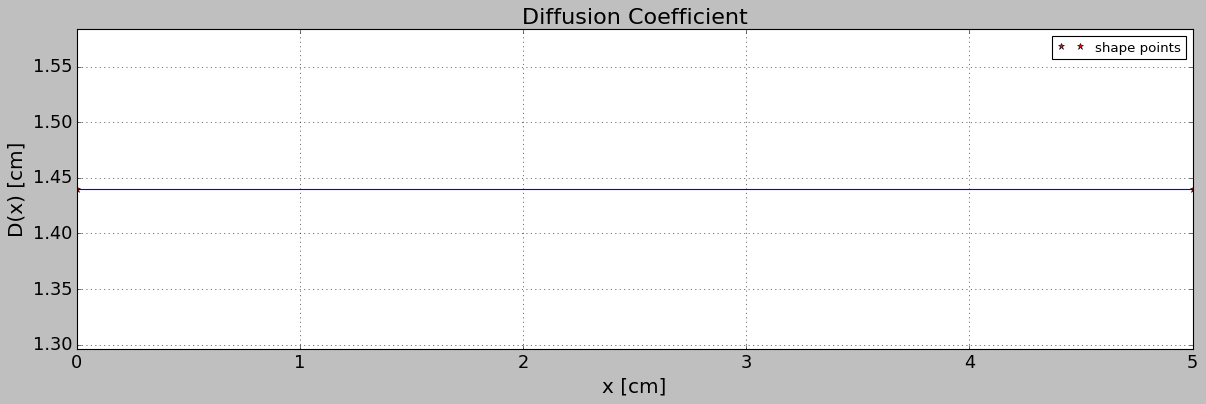

In [32]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(x_a, diffusion_coeff_1), (x_s, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[diffusion_coeff_1/unit.cm*.9, 
                      diffusion_coeff_1/unit.cm*1.1])

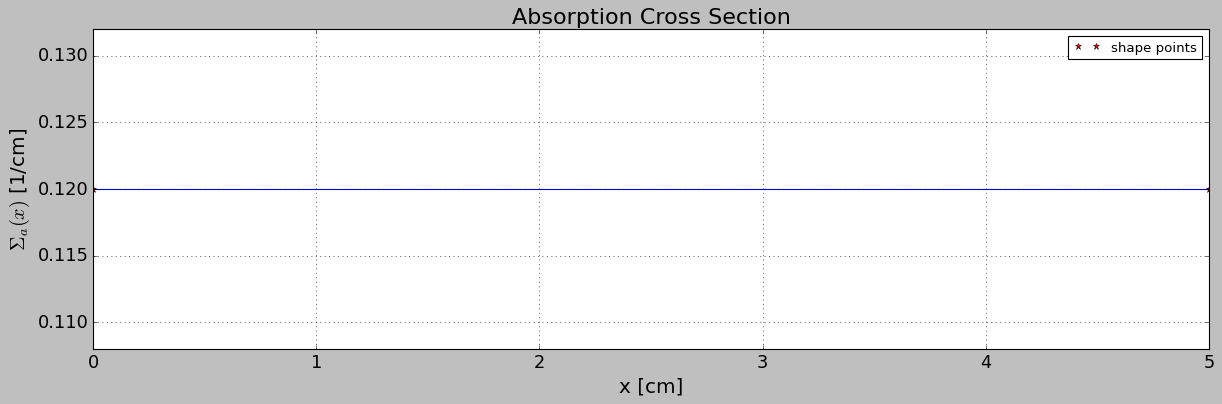

In [33]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_1), (x_s, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[sigma_a_1*unit.cm*.9, 
                   sigma_a_1*unit.cm*1.1])

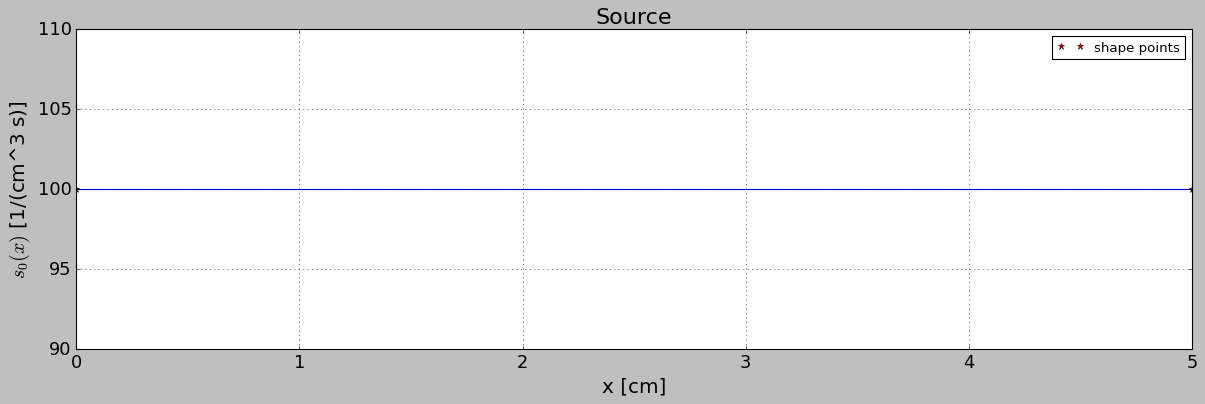

In [34]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, source_1), (x_s, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[source_1*unit.cm**3*unit.second*.9, 
                   source_1*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-bare"></a>

Specify basis functions distribution on the material domain and degree.

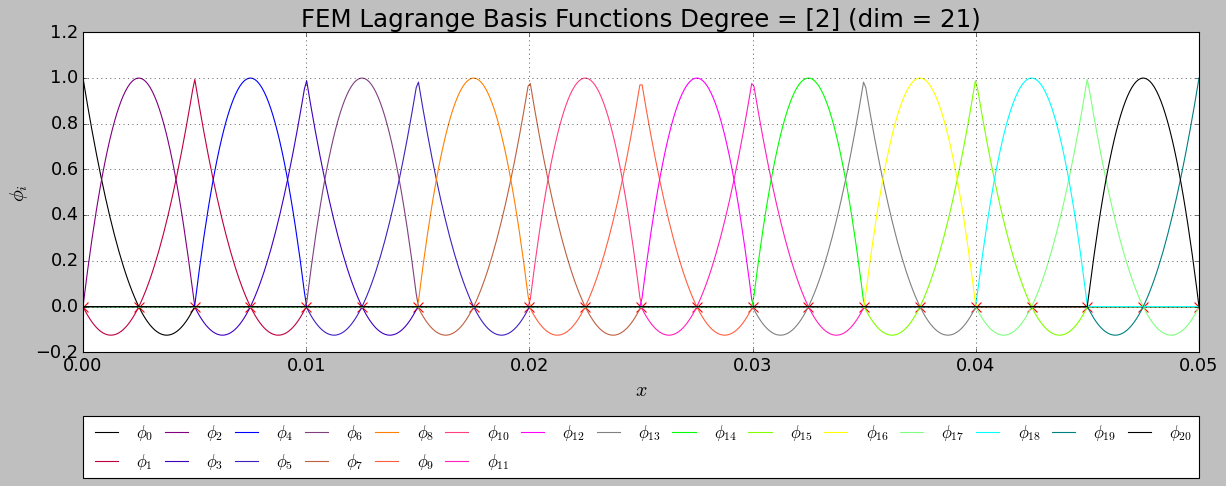

In [35]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2]
n_elem = [10] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_s])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) + 1/2\,\phi_j(b)\,\phi_i(b) $

In [36]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [37]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i)$

In [38]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
b_vec = s_vec

In [39]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-bare"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

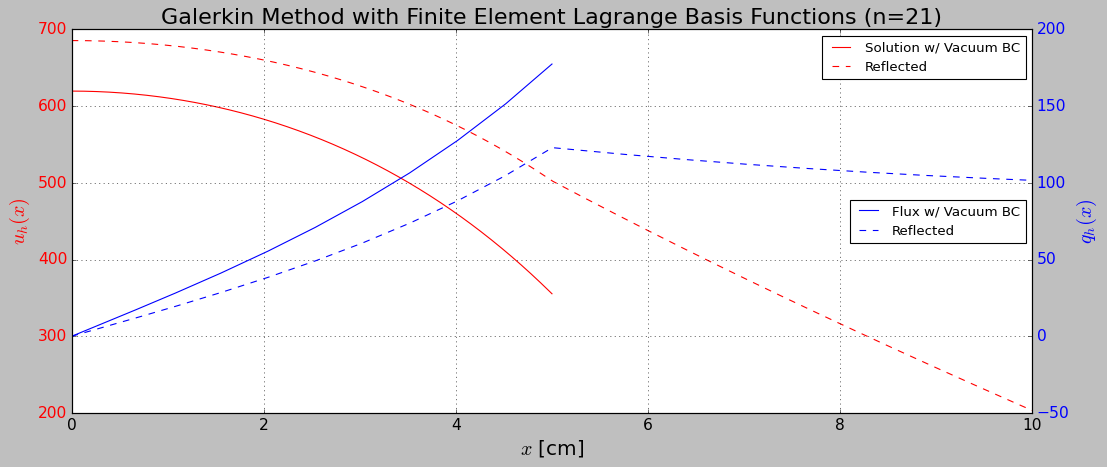

In [40]:
n_pts = 500
x = np.linspace(x_a, x_s, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values, x_reflected, u_values_reflected, q_values_reflected)

In [41]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [#/(cm^2 s)]= ', u_star(x_a)[0]*unit.cm**2*unit.second, '  u^*_N(s) [#/(cm^2 s)]= ', u_star(x_s)[0]*unit.cm**2*unit.second)
print("u^*'_N(a) [#/(cm^3 s)]= ", u_prime_star(x_a)[0]*unit.cm*unit.second, " u^*'_N(s) [#/(cm^3 s)]= ", u_prime_star(x_s)[0]*unit.cm*unit.second)
u_xa_bare = u_star(x_a)[0]*unit.cm**2*unit.second

u^*_N(a) [#/(cm^2 s)]=  619.5393334670628   u^*_N(s) [#/(cm^2 s)]=  355.38667479228934
u^*'_N(a) [#/(cm^3 s)]=  61.94761610984802  u^*'_N(s) [#/(cm^3 s)]=  -1231972.4571260596


In [42]:
'''u(x_a) comparison'''
print('u(x_a) gain w/ reflection [%] = ',(u_xa_reflected - u_xa_bare)/u_xa_bare*100)

u(x_a) gain w/ reflection [%] =  10.62934932064503


In [43]:
'''Flux at left boundary'''

print('q_na given    [#/(cm^2 s)]= ', q_na)
q_na_N = -(-diffusion_coeff(x_a)*u_prime_star(x_a)[0])*unit.cm**2*unit.second
print('q_na computed [#/(cm^2 s)]= ', q_na_N)

q_na given    [#/(cm^2 s)]=  0
q_na computed [#/(cm^2 s)]=  0.008920456719818115


In [44]:
'''Flux at right boundary'''

print('q_ns given    [#/(cm^2 s)]= ', u_star(x_s)[0]/2*unit.cm**2*unit.second)
q_ns_N = -diffusion_coeff(x_s)*u_prime_star(x_s)[0]*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)
q_ns_bare = q_ns_N

q_ns given    [#/(cm^2 s)]=  177.69333739614467
q_ns computed [#/(cm^2 s)]=  177.40403382615256


In [45]:
'''qn(x_s) comparison'''
print('qn(x_s) reduction w/ reflection [%] = ',(q_ns_reflected - q_ns_bare)/q_ns_bare*100)

qn(x_s) reduction w/ reflection [%] =  -30.907056671858818


In [46]:
'''Total power (integrated source)'''
from scipy.integrate import quad
Source = lambda x: source(x) - sigma_a(x) * u_star(x)
(total_power_1, _) = quad(Source, x_a, x_s, limit=500)
total_power = (total_power_1)*unit.cm**2*unit.second
print('integrated source [#/(cm^2 s)]=', total_power)

integrated source [#/(cm^2 s)]= 177.69333711503623


In [47]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(q_na_N + q_ns_N - total_power)/total_power))

Total flux balance relative error [%] = -0.16 


In [48]:
x_vec = np.linspace(x_a, x_s, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +6.19539e+02     -8.92046e-03
+1.28205e-01   +6.19393e+02     +3.29050e+00
+2.56410e-01   +6.18953e+02     +6.58993e+00
+3.84615e-01   +6.18220e+02     +9.88936e+00
+5.12821e-01   +6.17193e+02     +1.31776e+01
+6.41026e-01   +6.15869e+02     +1.65459e+01
+7.69231e-01   +6.14246e+02     +1.99142e+01
+8.97436e-01   +6.12323e+02     +2.32825e+01
+1.02564e+00   +6.10101e+02     +2.66600e+01
+1.15385e+00   +6.07571e+02     +3.01674e+01
+1.28205e+00   +6.04729e+02     +3.36749e+01
+1.41026e+00   +6.01575e+02     +3.71823e+01
+1.53846e+00   +5.98108e+02     +4.07339e+01
+1.66667e+00   +5.94316e+02     +4.44537e+01
+1.79487e+00   +5.90192e+02     +4.81735e+01
+1.92308e+00   +5.85738e+02     +5.18933e+01
+2.05128e+00   +5.80951e+02     +5.57081e+01
+2.17949e+00   +5.75813e+02     +5.97179e+01
+2.30769e+00   +5.70317e+02     +6.37277e+01
+2.43590e+00   +5.64465e+02     +6.77374e+01
+2.56410e+00   +5.58253e+02     +7.19113e+01
+2.69231